# Data Collection and Storage Project

Data:
- project_sql_result_01.csv: company_name, trips_amount
- project_sql_result_04.csv: dropoff_location_name, average_trips
- project_sql_result_07.csv: start_ts, weather_conditions, duration_seconds

Tasks 01-04:
- import the files
- study the data they contain
- make sure the data types are correct
- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

Tasks 07:
- Test the hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." Set the significance level (alpha) value on your own.
- Explain:
    - how you formed the null and alternative hypotheses
    - what criterion you used to test the hypotheses and why

## Data Preparation

In [1]:
# Import modules here:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# Import data: 
company_df = pd.read_csv('/datasets/project_sql_result_01.csv')
location_df = pd.read_csv('/datasets/project_sql_result_04.csv')
weather_df = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
company_df.info()
company_df.describe()
company_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
location_df.info()
location_df.describe()
location_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
weather_df.info()
weather_df.describe()
weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [6]:
# Need to change start_ts to datetime
weather_df['start_ts'] = pd.to_datetime(weather_df['start_ts'])

**Observations:**
- Data looks good, could change average_trips and duration_seconds to int but not really necessary until final output
- Changed start_ts to datetime so we can pull dayofweek later

## EDA Visualizations

In [7]:
# identify the top 10 neighborhoods in terms of drop-offs
top_dropoff = location_df.head(10)
top_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


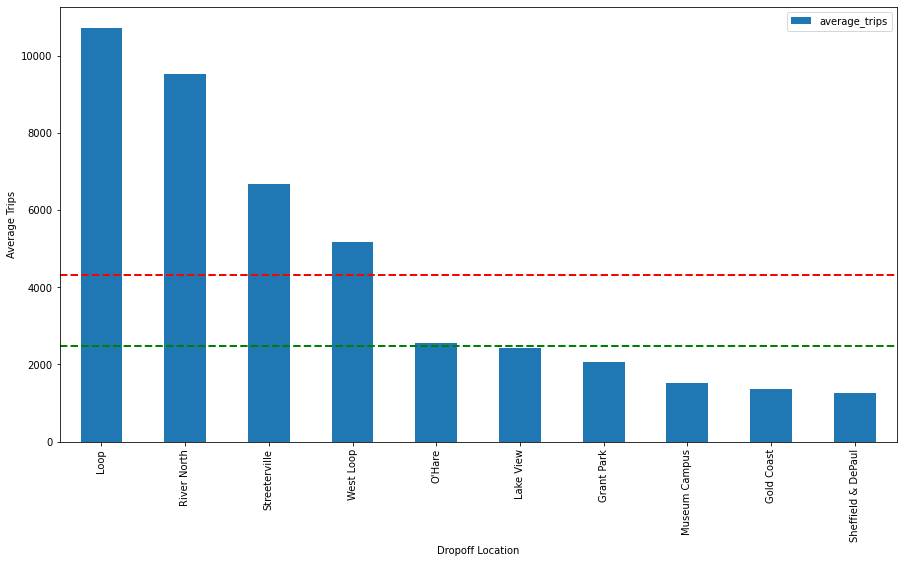

In [8]:
# make graphs: top 10 neighborhoods by number of dropoffs
#     in the top 10, 4 neighborhoods take the majority of dropoffs 
#     these 4 are the commercial and entertainment areas 

top_dropoff.plot(
    x='dropoff_location_name',
    y='average_trips',
    kind='bar',
    figsize=[15,8],
    xlabel='Dropoff Location',
    ylabel='Average Trips'
)

# Comparing to means and medians within top 10 
plt.axhline(y=top_dropoff['average_trips'].mean(), color='red', linestyle='--', linewidth=2)
plt.axhline(y=top_dropoff['average_trips'].median(), color='green', linestyle='--', linewidth=2)

plt.show()

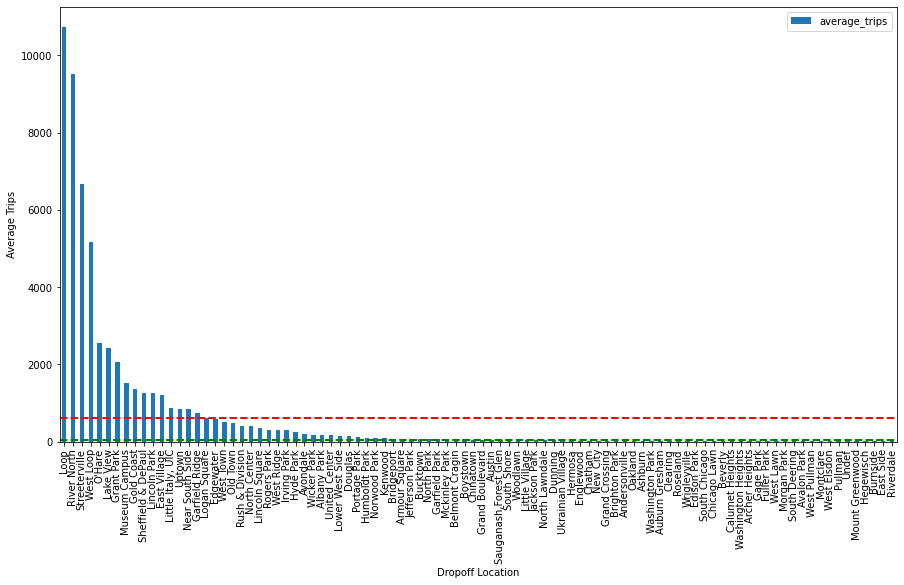

In [9]:
# comparing to all locations:
#     the top neighborhoods take the majority of drop-offs (pickups are probably more spread out)

location_df.plot(
    x='dropoff_location_name',
    y='average_trips',
    kind='bar',
    figsize=[15,8],
    xlabel='Dropoff Location',
    ylabel='Average Trips'
)

# Comparing to means and medians
plt.axhline(y=location_df['average_trips'].mean(), color='red', linestyle='--', linewidth=2)
plt.axhline(y=location_df['average_trips'].median(), color='green', linestyle='--', linewidth=2)

plt.show()

In [10]:
top_company = company_df.head(10)
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


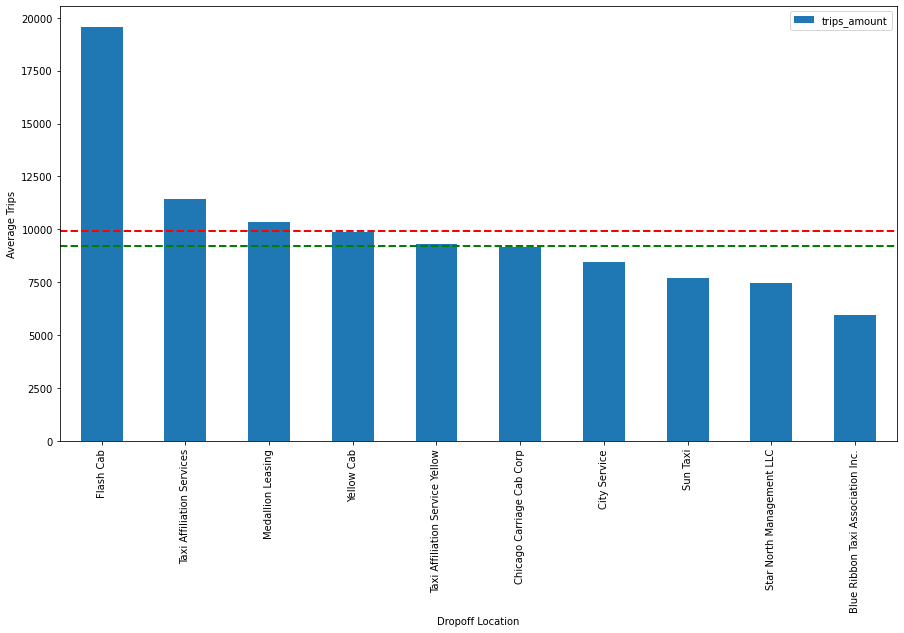

In [11]:
# make graphs: taxi companies and number of rides (top 10)

top_company.plot(
    x='company_name',
    y='trips_amount',
    kind='bar',
    figsize=[15,8],
    xlabel='Dropoff Location',
    ylabel='Average Trips'
)

# Comparing to means and medians of top companies:
plt.axhline(y=top_company['trips_amount'].mean(), color='red', linestyle='--', linewidth=2)
plt.axhline(y=top_company['trips_amount'].median(), color='green', linestyle='--', linewidth=2)

plt.show()

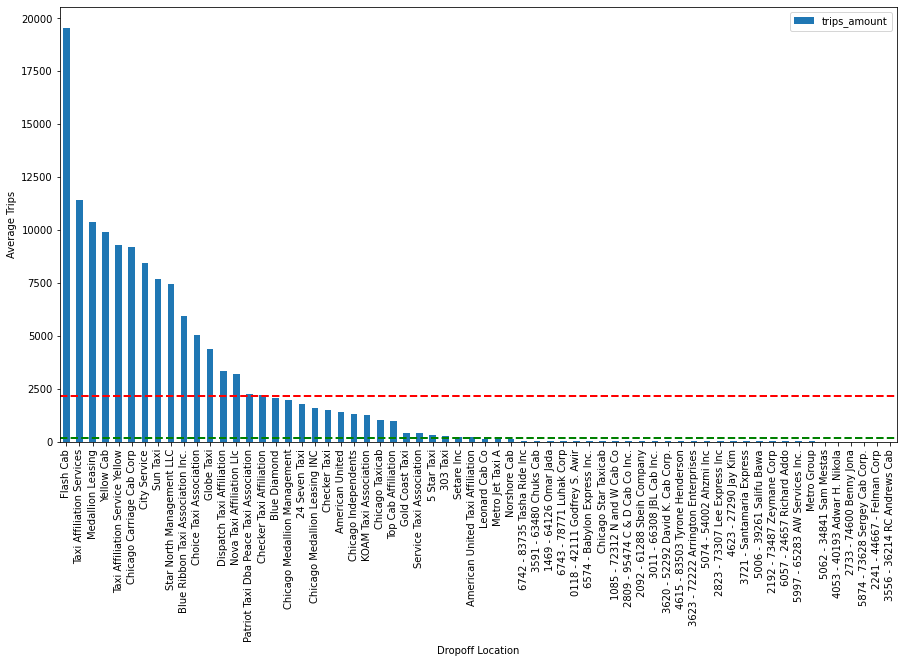

In [12]:
# make graphs: taxi companies and number of rides
#     similar to the location dropoff, the data is heavily skewed, the top companies take the majority of trips

company_df.plot(
    x='company_name',
    y='trips_amount',
    kind='bar',
    figsize=[15,8],
    xlabel='Dropoff Location',
    ylabel='Average Trips'
)

# Comparing to means and medians
plt.axhline(y=company_df['trips_amount'].mean(), color='red', linestyle='--', linewidth=2)
plt.axhline(y=company_df['trips_amount'].median(), color='green', linestyle='--', linewidth=2)

plt.show()

**Observations**
- Both datasets show heavy concentration in terms of dropoff location and taxi company rides
- Dropoff Locations:
    - Dropoffs are heavily concentrated in certain neighborhoods, both within the top 10 and in general
    - The most visited neighborhoods are the Loop neighborhoods (offices, work) and entertainment/shopping areas 
    - Most neighborhoods do not get many dropoffs (makes sense as amenities are concentrated whereas residences are spread out) 
- Company Volumes:
    - Similarly, a few taxi companies take the majority of rides 
    - Flash Cab has the most trip volume by far
    - Most companies are significantly below the average in terms of volume 

## Hypothesis Testing
- Note: weather_df contains data on rides from the Loop to the airport
- Test the hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
- We need to cut the data to only include saturdays
- Then split it into good and bad weather

In [13]:
# Saturday is 5 - all the data is Saturday (forgot about this so the dayofweek transformation was unecessary)
weather_df['dow'] = weather_df['start_ts'].dt.dayofweek
weather_df['dow'].value_counts()

5    1068
Name: dow, dtype: int64

In [14]:
weather_df['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [15]:
good_weather_df = weather_df.query('weather_conditions == "Good"')['duration_seconds']
bad_weather_df = weather_df.query('weather_conditions == "Bad"')['duration_seconds']

weather_df.groupby('weather_conditions')['duration_seconds'].mean()

weather_conditions
Bad     2427.205556
Good    1999.675676
Name: duration_seconds, dtype: float64

In [16]:
# Variance is about 11% higher for Good days
weather_df.groupby('weather_conditions')['duration_seconds'].var()

weather_conditions
Bad     520294.086002
Good    576382.009690
Name: duration_seconds, dtype: float64

In [17]:
# Hypothesis test on the equality of population means - we're testing if there is a difference
# The Null hypothesis is that there is no statistically significant difference
# p-value is so low we can reject the null hypothesis at any reasonable level

alpha = 0.05  # critical statistical significance level, if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(good_weather_df, bad_weather_df, equal_var=True)
print('p-value: ', results.pvalue) # p-value is the probability of randomly getting a difference that size or larger.

if results.pvalue < alpha:
    print("Reject the null hypothesis") 
else:
    print("Can't reject the null hypothesis") 

p-value:  6.517970327099473e-12
Reject the null hypothesis


In [18]:
results

Ttest_indResult(statistic=-6.946177714041499, pvalue=6.517970327099473e-12)

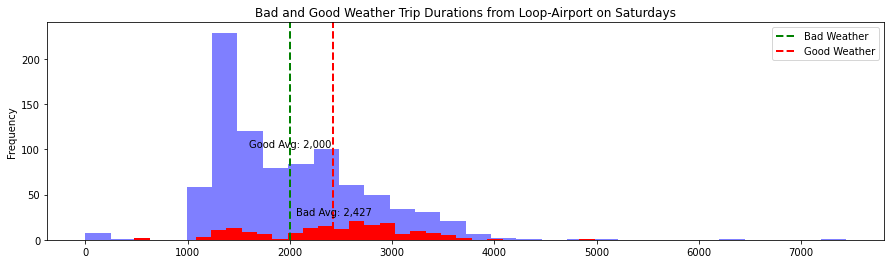

In [20]:
# Comparing good and bad weather distributions
#     Good weather Saturdays have a much bigger right skewed distribution
#     Both good and bad weather days show 2 peaks (probably another factor impacting traffic)

good_weather_df.plot(
    kind='hist',
    bins=30,
    figsize=[15,4],
    title='Bad and Good Weather Trip Durations from Loop-Airport on Saturdays',
    color='b',
    alpha=0.5
)

bad_weather_df.plot(
    kind='hist',
    bins=30,
    color='r',
    alpha=1
)

good_mean = good_weather_df.mean()
bad_mean = bad_weather_df.mean()

plt.axvline(good_mean, color='green', linestyle='--', linewidth=2)
plt.axvline(bad_mean, color='red', linestyle='--', linewidth=2)

plt.text(good_mean, 100, f"Good Avg: {good_mean:,.0f}", color='black', ha='center', va='bottom')
plt.text(bad_mean, 25, f"Bad Avg: {bad_mean:,.0f}", color='black', ha='center', va='bottom')

plt.legend(['Bad Weather', 'Good Weather'])
plt.show()

## Conclusions
- Our hypothesis test on the equality of means shows that trip duration is different depending on weather
- Specifically, we rejected the null hypothesis that there is no statistically significant difference between the average trip duration on good and bad weather days 
- Which means that there is a miniscule probability that the difference between the two populations is due to chance 
- We also found that there is heavy concentration in terms of taxi volume and dropoff location volume
- The top dropoff locations take the majority of taxi transit volume, with the top being the Loop neighborhoods and the central entertainment and commercial areas 
- Most neighborhoods get very little dropoff traffic, as they are mostly residential neighborhoods 
- Similarly the top taxi companies take the majority of volume, with Flash Cab being a notable leader 
- Similar to dropoff location volume, the data is skewed with a small number of the top companies taking most of the volume while most companies do far below the average in terms of volume 